In [236]:
import sys
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

import Utility as ut
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

from matplotlib.lines import Line2D

from collections import Counter

np.random.seed(0)

In [237]:
def monthToNumber(month):
    if month=='gen':
        return 1
    if month=='feb':
        return 2
    if month=='mar':
        return 3
    if month=='apr':
        return 4
    if month=='mag':
        return 5
    if month=='giu':
        return 6
    if month=='lug':
        return 7
    if month=='ago':
        return 8
    if month=='set':
        return 9
    if month=='ott':
        return 10
    if month=='nov':
        return 11
    if month=='dic':
        return 12
    
def getMonth(pdSeries):
    months = []
    for i in range(len(pdSeries)):
        months.append(monthToNumber(pdSeries[i]))
    # print(months)
    return months

def weekToNumber(week):
    if week=='I':
        return '01'
    if week=='II':
        return '08'
    if week=='III':
        return '15'
    if week=='IV':
        return '22'
    if week=='V':
        return '30'

def getWeek(pdSeries):
    weeks = []
    for i in range(len(pdSeries)):
        weeks.append(weekToNumber(pdSeries[i]))
    # print(months)
    return weeks

In [238]:
prices_organic = pd.read_csv("../Data/EggsData/PriceForlìBio.csv", sep=";")
prices_non_organic = pd.read_csv("../Data/EggsData/PriceForlìTerra.csv", sep=";")

organic_date = []
organic_months = getMonth(prices_organic['Mese'])
organic_day = getWeek(prices_organic['SettimanaPerMese'])

non_organic_date = []
non_organic_months = getMonth(prices_non_organic['Mese'])
non_organic_day = getWeek(prices_non_organic['SettimanaPerMese'])

for i in range(len(prices_organic)):
    organic_date.append( str(organic_day[i]) + '/' +  str(organic_months[i]) + '/' + str(prices_organic['Anno'][i]) )
    
for i in range(len(prices_non_organic)):
    non_organic_date.append( str(non_organic_day[i]) + '/' +  str(non_organic_months[i]) + '/' + str(prices_non_organic['Anno'][i]) )

prices_organic["Date"] = organic_date
prices_non_organic["Date"] = non_organic_date

prices_non_organic = prices_non_organic[prices_non_organic['Varieta']=='M (Tra 53 E 63 Gr)']

prices_organic["Date"] = pd.to_datetime(prices_organic["Date"], format = '%d/%m/%Y')
prices_non_organic["Date"] = pd.to_datetime(prices_non_organic["Date"], format = '%d/%m/%Y')

prices_organic = prices_organic.sort_values(by = ['Date'])
prices_non_organic = prices_non_organic.sort_values(by = ['Date'])

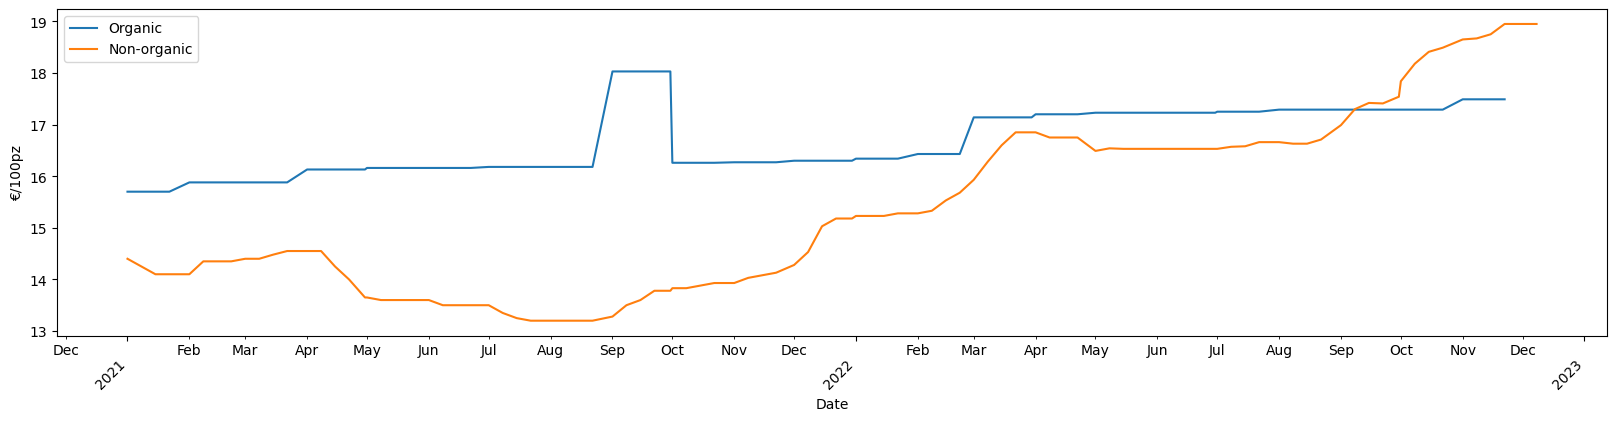

In [239]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel("€/100pz")
#Select to plot just years
ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%Y"))
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
fig.set_figwidth(20)
plt.setp(ax1.get_xticklabels(), rotation=0, ha="center")

ax1.plot(prices_organic["Date"], prices_organic["PrezzoMedio"], label="Organic")
ax1.plot(prices_non_organic["Date"], prices_non_organic["PrezzoMedio"], label="Non-organic")
ax1.legend()


plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
plt.show()